In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
# Membuka dataset train saham TATA
dataset_train = pd.read_csv('NSE-TATAGLOBAL.csv')
# Mengalokasikan nilai atribut Open dan High ke training_set
training_set = dataset_train.iloc[:, 1:2].values
# Dilakukan untuk mengecek 5 data awal dalam dataset.
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [10]:
# Membuka dataset test saham TATA
dataset_test = pd.read_csv('tatatest.csv')
# Mengalokasikan nilai atribut Open dan High ke real_stock_price
real_stock_price = dataset_test.iloc[:, 1:2].values

## Feature Scaling menggunakan MinMaxScaler

Dalam pembuatan model deep learning, Scaling umumnya dilakukan dalam tahap preproses untuk normalisasi data jika nilai atribut-atribut berbeda-beda magnitude-nya. Proses feature scaling berfungsi untuk menghindari masalah tersebut dan juga dapat membantu kecepatan kalkulasi dalam algoritma pembelajaran.

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
# Mengalokasikan hasil scaling ke X_train (atribut) dan y_train (target) dalam bentuk 3D array
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


Dalam proses pembuatan model LSTM. LSTM layer ditambahkan dengan nilai parameter sebagai berikut :

- Dimensionality of the output space = 50 units
- return_sequences = true, sehingga akan return last output dalam output sequence.
- input_shape = menyesuaikan dengan training set yang telah dibuat.

Selanjutnya, nilai Dropout layer diset ke 0.2, yang artinya 20% dari layers akan dibuang. Sehingga dapat ditambahkan  Dense layer yang menetapkan 1 unit output. Setelah itu, model di-compile menggunakan metode Adam optimizer dan set mean_squared_error yang menghitung rata-rata dari squared error.


In [7]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1975/1975 [==============================] - 16s 8ms/step - loss: 0.0095
Epoch 2/100
1975/1975 [==============================] - 10s 5ms/step - loss: 0.0031
Epoch 3/100
1975/1975 [==============================] - 10s 5ms/step - loss: 0.0029: 2
Epoch 4/100
1975/1975 [==============================] - 9s 5ms/step - loss: 0.0029
Epoch 5/100
1975/1975 [==============================] - 10s 5ms/step - loss: 0.0026
Epoch 6/100
1975/1975 [==============================] - 10s 5ms/step - loss: 0.0020
Epoch 7/100
1975/1975 [==============================] - 10s 5ms/step - loss: 0.0021
Epoch 8/100
1975/1975 [==============================] - 9s 5ms/step - loss: 0.0022
Epoch 9/100
1975/1975 [==============================] - 10s 5ms/step - loss: 0.0023
Epoch 10/100
1975/1975 [==============================] - 10s 5ms/step - loss: 0.0022
Epoch 11/100
1975/1975 [==============================] - 10s 5ms/step - loss: 0.0019
Epoch 12/100
1975/1975 [==============================] - 10s 

In [8]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Memprediksi dataset saham TATA test.
predicted_stock_price = regressor.predict(X_test)

# Hasil prediksi diproses dengan fungsi inverse_transform untuk mengembalikan format data agar dapat lebih mudah dibaca.
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

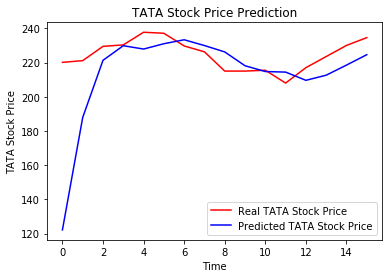

In [11]:
# Visualisasi hasil prediksi dengan harga nyata di periode yang sama
plt.plot(real_stock_price, color = 'red', label = 'Real TATA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()